In [18]:
import pandas as pd

df = pd.read_csv('results.txt', delimiter=',')
res = pd.pivot_table(df, values='accuracy', index=['model', 'Fs', 'cut-off'], columns=['experiment'], aggfunc="mean")
res['F10'] = (res['E10'] + res['F10'])/2
res['F11'] = (res['E11'] + res['F11'])/2
res.drop(columns=['E10', 'E11'], inplace=True)


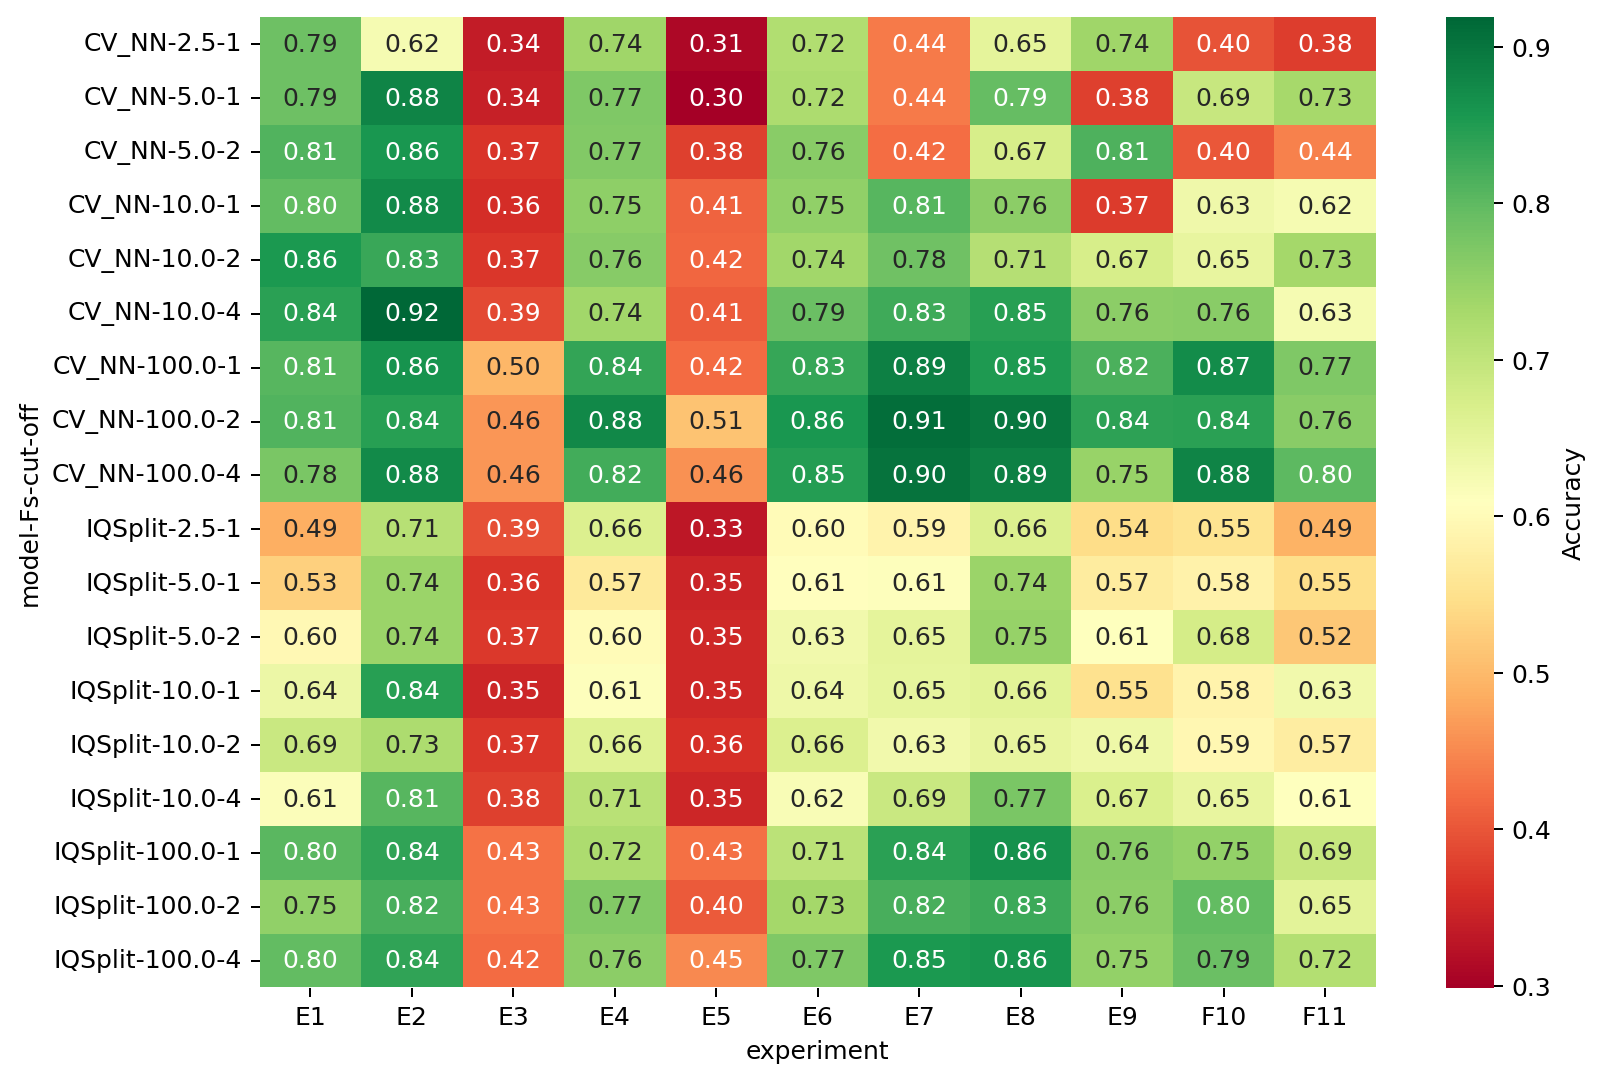

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7), dpi=180  )

sns.heatmap(res, cmap="RdYlGn", annot=True, fmt="0.2f", cbar_kws={'label': 'Accuracy'})
plt.show()

In [20]:
from pylab import *
cmap = cm.get_cmap('RdYlGn', 1000)
def get_color(val):
    val = int((val - 0.2)/(1- 0.2)*1000)
    return matplotlib.colors.rgb2hex(cmap(val) )[1:]
# print(get_color(0.5))


latex_table = r'''
\begin{table}[h!]
\footnotesize
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\multicolumn{3}{|c|}{\textbf{\rotatebox[origin=c]{90}{ \#frames }}}
&\rotatebox[origin=c]{90}{ 1,448 } 
& \rotatebox[origin=c]{90}{797}
& \rotatebox[origin=c]{90}{21,154}
& \rotatebox[origin=c]{90}{21,154}
& \rotatebox[origin=c]{90}{20,626}
& \rotatebox[origin=c]{90}{20,626}
& \rotatebox[origin=c]{90}{2,936}
&\rotatebox[origin=c]{90}{3,128}
& \rotatebox[origin=c]{90}{3,221} 
& \rotatebox[origin=c]{90}{ 6,055 }
&\rotatebox[origin=c]{90}{ 6,023 }\\
    
\hline

\multicolumn{3}{|c|}{ \rotatebox[origin=c]{90}{ Type }}
& \multicolumn{6}{c|}{\textbf{\cellcolor[HTML]{EFEFEF}Off-Body}}
& \multicolumn{5}{c|}{\textbf{\cellcolor[HTML]{EFEFEF}On-Body}}\\ 

\hline


\multicolumn{1}{|c|}{}&\multicolumn{1}{c|}{\textbf{Fs}}& \textbf{\rotatebox[origin=c]{90}{ cut-off }}
& \multicolumn{1}{c|}{}& \multicolumn{1}{c|}{}& \multicolumn{1}{c|}{}& \multicolumn{1}{c|}{}
& \multicolumn{1}{c|}{}& & \multicolumn{1}{c|}{}& \multicolumn{1}{c|}{}& \multicolumn{1}{c|}{}
& \multicolumn{1}{c|}{} &  \\ 

\cline{2-3}

\multicolumn{1}{|c|}{\multirow{-3}{*}{\textbf{\rotatebox[origin=c]{90}{\textbf{model}}}}} 
& \multicolumn{2}{c|}{(MHz)}  & \multicolumn{1}{c|}{\multirow{-3}{*}{\textbf{E1}}} 
& \multicolumn{1}{c|}{\multirow{-3}{*}{\textbf{E2}}} 
& \multicolumn{1}{c|}{\multirow{-3}{*}{\textbf{E3}}} 
& \multicolumn{1}{c|}{\multirow{-3}{*}{\textbf{E4}}} 
& \multicolumn{1}{c|}{\multirow{-3}{*}{\textbf{E5}}} 
& \multirow{-3}{*}{\textbf{E6}} 
& \multicolumn{1}{c|}{\multirow{-3}{*}{\textbf{E7}}} 
& \multicolumn{1}{c|}{\multirow{-3}{*}{\textbf{E8}}} 
& \multicolumn{1}{c|}{\multirow{-3}{*}{\textbf{E9}}} 
& \multicolumn{1}{c|}{\multirow{-3}{*}{\textbf{E10}}} 
& \multirow{-3}{*}{\textbf{E11}} \\ 

\hline
'''
cnt = 1
for index, row in res.iterrows():
    
    if cnt%9 == 0:
        model = r"\multirow{-9}{*}{\rotatebox[origin=c]{90}{\textbf{\cellcolor[HTML]{EFEFEF}" + ('CV-CNN' if index[0]=='CV_NN' else "IQ Splitting" ) + r"}}}"
    else:
        model = r'\multicolumn{1}{|c|}{\cellcolor[HTML]{EFEFEF}}'
    fs = index[1]
    cutoff = index[2]
    accuracy = row[['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'F10', 'F11']]
    latex_table += f'{model} & {int(fs) if fs!=2.5 else fs} & {cutoff}'
    for acc in accuracy:
        latex_table += ' & \cellcolor[HTML]{'+get_color(acc)+'}'+ f'{acc:.2f}'
    latex_table +=' \\\\\n'
    if cnt%9 == 0:
        latex_table += r'\hline'
    cnt += 1

latex_table += r'''
\end{tabular}
\caption{\footnotesize Fingerprinting accuracy for 12 nodes both on-body and off-body 
using three models including Frequency Deviation, Complex-Valued Neural Network, 
and IQ splitting method. Every model was tested under different sampling frequency $(F_s)$ 
MSps and Butterworth cut-off frequency (cut-off)  MHz.}
\label{tbl:res}
\end{table}

'''

print(latex_table)



\begin{table}[h!]
\footnotesize
\begin{tabular}{|c|c|c|c|c|c|c|c|c|c|c|c|c|c|}
\hline
\multicolumn{3}{|c|}{\textbf{\rotatebox[origin=c]{90}{ \#frames }}}
&\rotatebox[origin=c]{90}{ 1,448 } 
& \rotatebox[origin=c]{90}{797}
& \rotatebox[origin=c]{90}{21,154}
& \rotatebox[origin=c]{90}{21,154}
& \rotatebox[origin=c]{90}{20,626}
& \rotatebox[origin=c]{90}{20,626}
& \rotatebox[origin=c]{90}{2,936}
&\rotatebox[origin=c]{90}{3,128}
& \rotatebox[origin=c]{90}{3,221} 
& \rotatebox[origin=c]{90}{ 6,055 }
&\rotatebox[origin=c]{90}{ 6,023 }\\
    
\hline

\multicolumn{3}{|c|}{ \rotatebox[origin=c]{90}{ Type }}
& \multicolumn{6}{c|}{\textbf{\cellcolor[HTML]{EFEFEF}Off-Body}}
& \multicolumn{5}{c|}{\textbf{\cellcolor[HTML]{EFEFEF}On-Body}}\\ 

\hline


\multicolumn{1}{|c|}{}&\multicolumn{1}{c|}{\textbf{Fs}}& \textbf{\rotatebox[origin=c]{90}{ cut-off }}
& \multicolumn{1}{c|}{}& \multicolumn{1}{c|}{}& \multicolumn{1}{c|}{}& \multicolumn{1}{c|}{}
& \multicolumn{1}{c|}{}& & \multicolumn{1}{c|}{}& \multi

/tmp/ipykernel_2679111/431857850.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('RdYlGn', 1000)
